# 23BAI1156 - KOMMANA SRIRAM

In [1]:
# What this cell does:
# This cell imports all essential libraries required for performing numerical computations,
# data visualization, and deep learning model implementation. NumPy is used for numerical
# array processing, Matplotlib is used to visualize graphs and images, TensorFlow and Keras
# provide the deep learning framework, and specific optimizers like Adagrad, RMSprop, and Adam
# are imported to compare their behavior during training.
#
# Output:
# This cell does not produce visible output, but all libraries are successfully loaded into memory,
# enabling subsequent model creation, training, and evaluation.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adagrad, RMSprop, Adam

print("TF Version:", tf.__version__)

/home/student/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2026-02-03 13:03:03.939317: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-03 13:03:04.047349: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-03 13:03:08.567972: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operati

TF Version: 2.20.0


In [2]:
# What this cell does:
# This cell loads the MNIST dataset, which consists of handwritten digit images from 0 to 9.
# The pixel values are normalized from the range 0–255 to 0–1 to improve neural network training stability.
# Each 28x28 image is reshaped into a 784-length feature vector to be used as input to a fully connected neural network.
#
# Output:
# No direct printed output, but the training set contains 60,000 samples and the test set contains
# 10,000 samples, both preprocessed and ready for training.

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

print("Dense Dataset Shape:", x_train.shape)

Dense Dataset Shape: (60000, 784)


In [3]:
# What this cell does:
# This cell creates a sparse version of the dataset by setting all pixel values below a threshold (0.3) to zero.
# This simulates sparse feature conditions, which is useful for studying how optimizers perform when many inputs are zero.
#
# Output:
# The cell prints the sparsity percentage, showing the proportion of zero-valued elements in the sparse dataset.

x_train_sparse = x_train.copy()
x_test_sparse = x_test.copy()

threshold = 0.3
x_train_sparse[x_train_sparse < threshold] = 0
x_test_sparse[x_test_sparse < threshold] = 0

print("Sparsity %:", np.mean(x_train_sparse == 0) * 100)

Sparsity %: 84.89348639455783


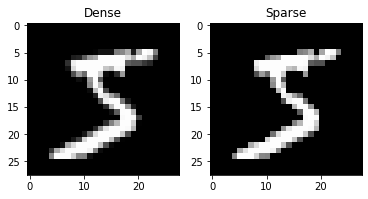

In [4]:
# What this cell does:
# This cell visualizes the difference between the original dense image and the sparse image.
# It demonstrates how thresholding removes less significant pixel values while retaining key features.
#
# Output:
# Two grayscale images are displayed: one original and one sparse version.

plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title("Dense")

plt.subplot(1,2,2)
plt.imshow(x_train_sparse[0].reshape(28,28), cmap='gray')
plt.title("Sparse")

plt.show()

In [5]:
# What this cell does:
# This cell defines the neural network architecture. The model consists of an input layer with 784 neurons,
# a first hidden layer with 256 neurons using ReLU activation, a second hidden layer with 128 neurons using ReLU,
# and an output layer with 10 neurons using Softmax activation for multi-class classification.
#
# Output:
# No direct output; the model architecture function is defined and ready to be used.

def create_model():
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [6]:
# What this cell does:
# This cell defines a training function that compiles the model with a specified optimizer,
# uses sparse categorical cross-entropy loss, tracks accuracy, and trains the model for a given dataset.
#
# Output:
# Training logs are printed for each epoch, including loss and accuracy values.

def train_model(optimizer, x_data, y_data):
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_data, y_data,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.1,
                        verbose=1)
    return history

In [7]:
# What this cell does:
# This cell trains the neural network on the dense dataset using Adagrad, RMSprop, and Adam optimizers.
#
# Output:
# Displays training progress logs for all three optimizers.

hist_adagrad_dense = train_model(Adagrad(learning_rate=0.01), x_train, y_train)
hist_rms_dense = train_model(RMSprop(learning_rate=0.001), x_train, y_train)
hist_adam_dense = train_model(Adam(learning_rate=0.001), x_train, y_train)

2026-02-03 13:04:18.657335: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/student/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8173 - loss: 0.7140 - val_accuracy: 0.9168 - val_loss: 0.2986
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9077 - loss: 0.3257 - val_accuracy: 0.9345 - val_loss: 0.2345
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9221 - loss: 0.2718 - val_accuracy: 0.9407 - val_loss: 0.2083
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9321 - loss: 0.2388 - val_accuracy: 0.9503 - val_loss: 0.1830
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9391 - loss: 0.2140 - val_accuracy: 0.9558 - val_loss: 0.1649
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9446 - loss: 0.1946 - val_accuracy: 0.9577 - val_loss: 0.1551
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9489 - loss: 0.1782 - val_accuracy: 0.9625 - val_loss: 0.1423
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9534 - loss: 0.1643 - val_accuracy: 0.

In [8]:
# What this cell does:
# This cell trains the neural network on the sparse dataset using the same optimizers,
# enabling comparison of optimizer performance under sparse input conditions.
#
# Output:
# Training logs for sparse data experiments.

hist_adagrad_sparse = train_model(Adagrad(learning_rate=0.01), x_train_sparse, y_train)
hist_rms_sparse = train_model(RMSprop(learning_rate=0.001), x_train_sparse, y_train)
hist_adam_sparse = train_model(Adam(learning_rate=0.001), x_train_sparse, y_train)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8131 - loss: 0.7297 - val_accuracy: 0.9212 - val_loss: 0.3034
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9063 - loss: 0.3293 - val_accuracy: 0.9335 - val_loss: 0.2422
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9206 - loss: 0.2755 - val_accuracy: 0.9413 - val_loss: 0.2085
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9300 - loss: 0.2430 - val_accuracy: 0.9522 - val_loss: 0.1868
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9371 - loss: 0.2186 - val_accuracy: 0.9538 - val_loss: 0.1694
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9431 - loss: 0.1989 - val_accuracy: 0.9592 - val_loss: 0.1587
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9474 - loss: 0.1829 - val_accuracy: 0.9623 - val_loss: 0.1472
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9526 - loss: 0.1690 - val_accuracy: 0.

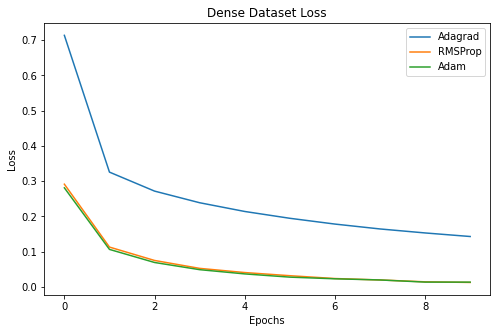

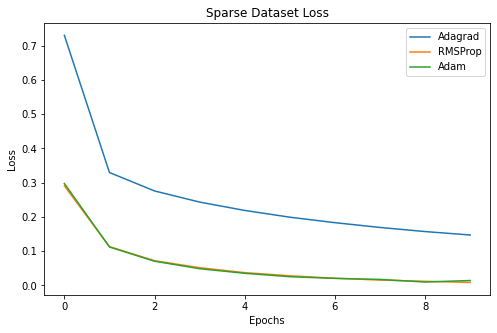

In [9]:
# What this cell does:
# Defines a function to plot training loss curves for multiple optimizers.
#
# Output:
# Displays loss vs epoch graph.

def plot_loss(histories, title):
    plt.figure(figsize=(8,5))
    for name, hist in histories.items():
        plt.plot(hist.history['loss'], label=name)
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

plot_loss({
    "Adagrad": hist_adagrad_dense,
    "RMSProp": hist_rms_dense,
    "Adam": hist_adam_dense
}, "Dense Dataset Loss")

plot_loss({
    "Adagrad": hist_adagrad_sparse,
    "RMSProp": hist_rms_sparse,
    "Adam": hist_adam_sparse
}, "Sparse Dataset Loss")

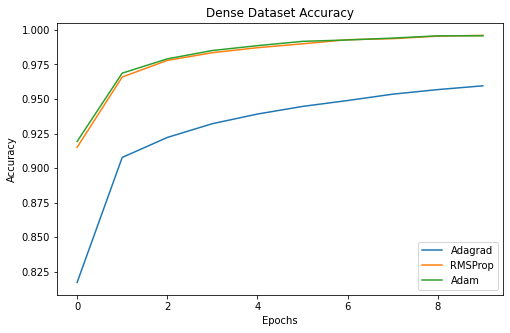

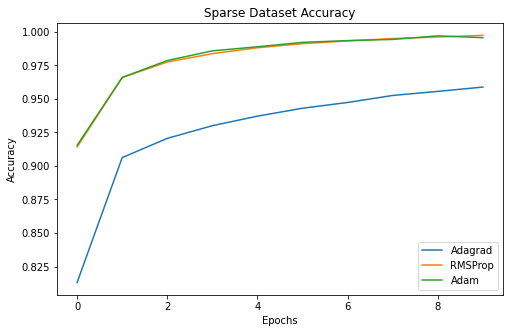

In [10]:
# What this cell does:
# Defines a function to plot training accuracy curves.
#
# Output:
# Displays accuracy vs epoch graph.

def plot_acc(histories, title):
    plt.figure(figsize=(8,5))
    for name, hist in histories.items():
        plt.plot(hist.history['accuracy'], label=name)
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_acc({
    "Adagrad": hist_adagrad_dense,
    "RMSProp": hist_rms_dense,
    "Adam": hist_adam_dense
}, "Dense Dataset Accuracy")

plot_acc({
    "Adagrad": hist_adagrad_sparse,
    "RMSProp": hist_rms_sparse,
    "Adam": hist_adam_sparse
}, "Sparse Dataset Accuracy")

In [11]:
# What this cell does:
# Defines a function to test different learning rates for a chosen optimizer and observe convergence behavior.
#
# Output:
# Training logs printed for each learning rate tested.

def lr_experiment(optimizer_class, lr_list, x_data, y_data, name):
    histories = {}
    
    for lr in lr_list:
        print(f"Training {name} with LR = {lr}")
        model = create_model()
        optimizer = optimizer_class(learning_rate=lr)
        
        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        history = model.fit(x_data, y_data,
                            epochs=5,
                            batch_size=128,
                            verbose=0)
        
        histories[f"lr={lr}"] = history
    
    return histories

In [12]:
# What this cell does:
# Executes learning rate experiments for Adam, RMSprop, and Adagrad optimizers.
#
# Output:
# Multiple training sessions printed.

lr_values = [0.1, 0.01, 0.001]

adam_lr_hist = lr_experiment(Adam, lr_values, x_train, y_train, "Adam")
rms_lr_hist = lr_experiment(RMSprop, lr_values, x_train, y_train, "RMSProp")
ada_lr_hist = lr_experiment(Adagrad, lr_values, x_train, y_train, "Adagrad")

Training Adam with LR = 0.1
Training Adam with LR = 0.01
Training Adam with LR = 0.001
Training RMSProp with LR = 0.1
Training RMSProp with LR = 0.01
Training RMSProp with LR = 0.001
Training Adagrad with LR = 0.1
Training Adagrad with LR = 0.01
Training Adagrad with LR = 0.001


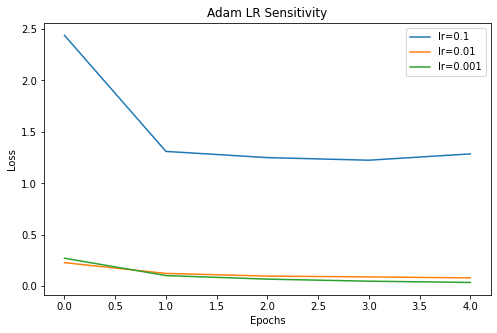

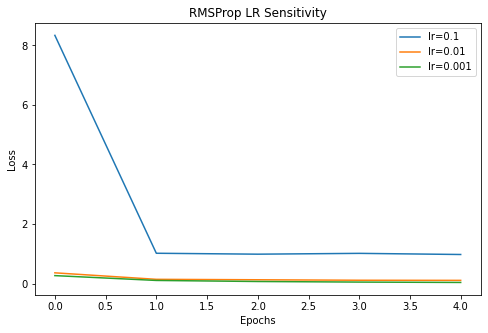

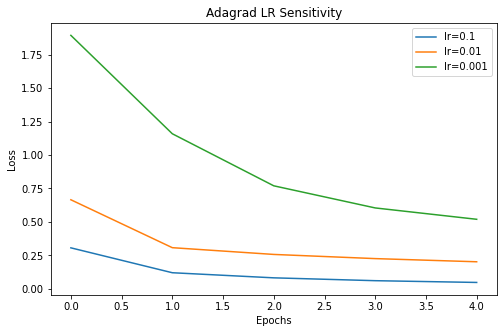

In [13]:
# What this cell does:
# Plots training loss curves for different learning rates.
#
# Output:
# Graph showing effect of learning rate on convergence.

def plot_lr(histories, title):
    plt.figure(figsize=(8,5))
    for label, hist in histories.items():
        plt.plot(hist.history['loss'], label=label)
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

plot_lr(adam_lr_hist, "Adam LR Sensitivity")
plot_lr(rms_lr_hist, "RMSProp LR Sensitivity")
plot_lr(ada_lr_hist, "Adagrad LR Sensitivity")

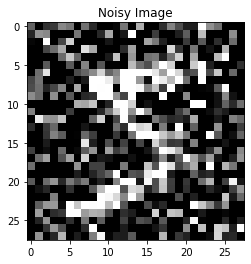

In [14]:
# What this cell does:
# Adds Gaussian noise to the training dataset to simulate noisy gradients and real-world data perturbations.
#
# Output:
# Displays a noisy handwritten digit image.

noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0, 1)

plt.imshow(x_train_noisy[0].reshape(28,28), cmap='gray')
plt.title("Noisy Image")
plt.show()

In [15]:
# What this cell does:
# Trains models on noisy data using different optimizers to analyze robustness.
#
# Output:
# Training logs under noisy conditions.

hist_adam_noise = train_model(Adam(0.001), x_train_noisy, y_train)
hist_rms_noise = train_model(RMSprop(0.001), x_train_noisy, y_train)
hist_ada_noise = train_model(Adagrad(0.01), x_train_noisy, y_train)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7866 - loss: 0.6688 - val_accuracy: 0.8762 - val_loss: 0.4014
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8768 - loss: 0.3858 - val_accuracy: 0.9020 - val_loss: 0.3123
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9121 - loss: 0.2748 - val_accuracy: 0.9162 - val_loss: 0.2645
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9354 - loss: 0.2003 - val_accuracy: 0.9203 - val_loss: 0.2553
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9550 - loss: 0.1421 - val_accuracy: 0.9238 - val_loss: 0.2567
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9705 - loss: 0.0952 - val_accuracy: 0.9210 - val_loss: 0.2650
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9829 - loss: 0.0603 - val_accuracy: 0.9215 - val_loss: 0.2810
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9907 - loss: 0.0375 - val_accuracy: 0.

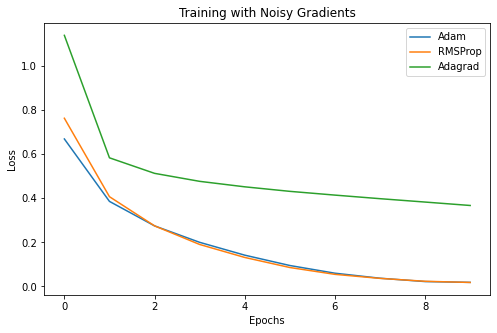

In [16]:
# What this cell does:
# Plots training loss curves for models trained on noisy data.
#
# Output:
# Loss comparison graph under noisy training.

plot_loss({
    "Adam": hist_adam_noise,
    "RMSProp": hist_rms_noise,
    "Adagrad": hist_ada_noise
}, "Training with Noisy Gradients")